In [1]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from pandas.core.dtypes.common import is_numeric_dtype
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso, Ridge
from sklearn.model_selection import train_test_split


url = 'https://raw.githubusercontent.com/rashakil-ds/Public-Datasets/main/automobile.csv'
df = pd.read_csv(url)

In [2]:
df.to_csv('unclean_dataset.csv')

In [3]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


In [4]:
df.columns

Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price'],
      dtype='object')

# Goal & Steps:

1. Predicting Car Prices:
   - Task: Build a regression model to predict the price (y=price) of cars based on other features in the dataset. This could involve preprocessing the data, selecting relevant features, and implementing `linear regression` and `KNN` algorithm.

2. Feature Engineering:
   - Task: Challenge students to come up with creative ways to engineer new features from the existing ones. For example, they could create a new feature representing the ratio of horsepower to curb weight.

3. Exploratory Data Analysis (EDA):
   - Task: Have students perform in-depth exploratory data analysis to understand the relationships between different features. Visualization tools can be used to communicate their findings effectively.

4. Handling Missing Data:
   - Task: Teach students how to handle missing data in a dataset. They can explore different strategies such as imputation or removal of missing values.

5. Training:
   - Task: Use relavant ML Models

6. Model evaluation:
- Evaluate models and Summarizing their findings. This should include a clear explanation of the model's performance and any insights gained from the analysis.

In [5]:
duplicate_row_count = df[df.duplicated()]
duplicate_row_count

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
201,-1,95.0,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,19,25,22625


In [6]:
category_column = df.select_dtypes(include=['object']).columns
category_column

Index(['make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style',
       'drive-wheels', 'engine-location', 'engine-type', 'num-of-cylinders',
       'fuel-system', 'bore', 'stroke', 'horsepower', 'peak-rpm'],
      dtype='object')

In [7]:
num_column = df.select_dtypes(include=['int64', 'float64']).columns
num_column

Index(['symboling', 'normalized-losses', 'wheel-base', 'length', 'width',
       'height', 'curb-weight', 'engine-size', 'compression-ratio', 'city-mpg',
       'highway-mpg', 'price'],
      dtype='object')

In [8]:
col_obj_to_num = []

for index, column in enumerate(category_column):
    is_numeric = df[column].str.match(r'^-?\d+(\.\d+)?$')
    num_count = is_numeric.sum()
    text_count = len(df[column]) - num_count

    percent_num = float(((num_count/len(df[column])) * 100))
    percent_text = float(((text_count/len(df[column])) * 100))
    
    if percent_num > 95:
        col_obj_to_num.append(column)

print(col_obj_to_num)

['bore', 'stroke', 'horsepower', 'peak-rpm']


In [9]:
df[col_obj_to_num]

,bore,stroke,horsepower,peak-rpm
0,3.47,2.68,111,5000
1,3.47,2.68,111,5000
2,2.68,3.47,154,5000
3,3.19,3.4,102,5500
4,3.19,3.4,115,5500
...,...,...,...,...
197,3.78,3.15,160,5300
198,3.58,2.87,134,5500
199,3.01,3.4,106,4800
200,3.78,3.15,114,5400


In [10]:
for index, column in enumerate(col_obj_to_num):
    df[column] = pd.to_numeric(df[column], errors='coerce')
#     means = df[column].mean()
#     df[column].fillna(means)

# df[col_obj_to_num].head()
# df[col_obj_to_num].to_csv('text_num.csv')

In [11]:
# df['clean_num_feature'] = df[num_column + col_obj_to_num].sum(axis=1)
# df['clean_num_feature']
df_clean_merge = pd.concat([df[num_column], df[col_obj_to_num]], axis=1)
df_clean_merge.head()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,city-mpg,highway-mpg,price,bore,stroke,horsepower,peak-rpm
0,3,NaN,88.6,168.8,64.1,48.8,2548,130,9.0,21,27,13495,3.47,2.68,111.0,5000.0
1,3,NaN,88.6,168.8,64.1,48.8,2548,130,9.0,21,27,16500,3.47,2.68,111.0,5000.0
2,1,NaN,94.5,171.2,65.5,52.4,2823,152,9.0,19,26,16500,2.68,3.47,154.0,5000.0
3,2,164.0,99.8,176.6,66.2,54.3,2337,109,10.0,24,30,13950,3.19,3.40,102.0,5500.0
4,2,164.0,99.4,176.6,66.4,54.3,2824,136,8.0,18,22,17450,3.19,3.40,115.0,5500.0


In [12]:
df_clean_merge.isnull().sum()

symboling             0
normalized-losses    37
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-size           0
compression-ratio     0
city-mpg              0
highway-mpg           0
price                 0
bore                  4
stroke                4
horsepower            2
peak-rpm              2
dtype: int64

In [13]:
for index, col in enumerate(df_clean_merge.columns):
        means = df_clean_merge[col].mean()
        df_clean_merge[col] = df_clean_merge[col].fillna(means)
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450


In [14]:
df_clean_merge.isnull().sum()

symboling            0
normalized-losses    0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-size          0
compression-ratio    0
city-mpg             0
highway-mpg          0
price                0
bore                 0
stroke               0
horsepower           0
peak-rpm             0
dtype: int64

In [21]:
df_clean_merge.head()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,city-mpg,highway-mpg,price,bore,stroke,horsepower,peak-rpm
0,3,121.836364,88.6,168.8,64.1,48.8,2548,130,9.0,21,27,13495,3.47,2.68,111.0,5000.0
1,3,121.836364,88.6,168.8,64.1,48.8,2548,130,9.0,21,27,16500,3.47,2.68,111.0,5000.0
2,1,121.836364,94.5,171.2,65.5,52.4,2823,152,9.0,19,26,16500,2.68,3.47,154.0,5000.0
3,2,164.000000,99.8,176.6,66.2,54.3,2337,109,10.0,24,30,13950,3.19,3.40,102.0,5500.0
4,2,164.000000,99.4,176.6,66.4,54.3,2824,136,8.0,18,22,17450,3.19,3.40,115.0,5500.0


In [15]:
# label_encoder = LabelEncoder()

In [16]:
# for index, col in enumerate(df.columns):
#     if is_numeric_dtype(df[col]):
#         means = df[col].mean()
#         df[col] = df[col].fillna(means)
#     else:
#         df[col] = label_encoder.fit_transform(df[col])
# df.head()

In [17]:
corr_number_column = df.select_dtypes(include=['int64', 'float64']).corr()
corr_number_column

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
symboling,1.000000,0.531064,-0.541598,-0.370773,-0.250262,-0.551691,-0.238419,-0.112429,-0.154722,-0.005726,-0.180012,0.073553,0.274601,-0.028289,0.042025,-0.090242
normalized-losses,0.531064,1.000000,-0.082988,0.016348,0.096067,-0.434269,0.113232,0.163334,-0.043964,0.066865,-0.131651,0.292232,0.261356,-0.251550,-0.204832,0.191829
wheel-base,-0.541598,-0.082988,1.000000,0.876689,0.816586,0.591751,0.782893,0.570654,0.501912,0.154513,0.247128,0.371294,-0.352788,-0.474246,-0.545504,0.588382
length,-0.370773,0.016348,0.876689,1.000000,0.858237,0.493897,0.881257,0.684445,0.613474,0.121701,0.158193,0.579834,-0.281589,-0.666999,-0.699408,0.692774
width,-0.250262,0.096067,0.816586,0.858237,1.000000,0.309088,0.866690,0.727941,0.550210,0.185426,0.187716,0.614075,-0.240313,-0.635681,-0.681924,0.753236
height,-0.551691,-0.434269,0.591751,0.493897,0.309088,1.000000,0.309904,0.075776,0.190143,-0.063778,0.258812,-0.086282,-0.308840,-0.053001,-0.107431,0.139003
curb-weight,-0.238419,0.113232,0.782893,0.881257,0.866690,0.309904,1.000000,0.848463,0.646700,0.165485,0.155245,0.757491,-0.275606,-0.750710,-0.795678,0.835277
engine-size,-0.112429,0.163334,0.570654,0.684445,0.727941,0.075776,0.848463,1.000000,0.581322,0.208874,0.028598,0.822791,-0.255475,-0.650490,-0.679611,0.871051
bore,-0.154722,-0.043964,0.501912,0.613474,0.550210,0.190143,0.646700,0.581322,1.000000,-0.057791,-0.000164,0.566839,-0.270024,-0.595393,-0.601140,0.547582
stroke,-0.005726,0.066865,0.154513,0.121701,0.185426,-0.063778,0.165485,0.208874,-0.057791,1.000000,0.188142,0.099530,-0.069259,-0.032910,-0.033667,0.080014


In [18]:
corr_number_column.to_csv('corelation.csv')

In [19]:
most_correlated_with_price = corr_number_column['price'].sort_values(ascending=False)
most_correlated_with_price

price                1.000000
engine-size          0.871051
curb-weight          0.835277
horsepower           0.809232
width                0.753236
length               0.692774
wheel-base           0.588382
bore                 0.547582
normalized-losses    0.191829
height               0.139003
stroke               0.080014
compression-ratio    0.069881
symboling           -0.090242
peak-rpm            -0.097752
city-mpg            -0.688254
highway-mpg         -0.705924
Name: price, dtype: float64

In [22]:
# high_corr_features = []
# predictor = 'price'
# df['price'].corr(df['make'])

# for col in df.columns:
#     if is_numeric_dtype(df[col]):
#             if col != predictor:
#                 high_corr_val = df[predictor].corr(df[col])
#                 if high_corr_val >= 0.5 and high_corr_val <= 1:
#                     high_corr_features.append(col)
# print(high_corr_features)

high_corr_features = []
predictor = 'price'

for col in df.columns:
    if is_numeric_dtype(df[col]):
            if col != predictor:
                high_corr_val = df_clean_merge[predictor].corr(df_clean_merge[col])
                if high_corr_val >= 0.5 and high_corr_val <= 1:
                    high_corr_features.append(col)
print(high_corr_features)


['wheel-base', 'length', 'width', 'curb-weight', 'engine-size', 'bore', 'horsepower']


<Axes: >

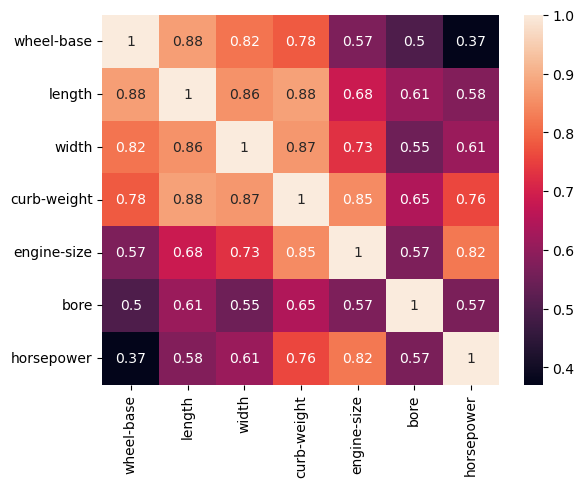

In [23]:
# sns.heatmap(df[high_corr_features].corr(), annot=True)
sns.heatmap(df_clean_merge[high_corr_features].corr(), annot=True)

In [ ]:
nums = df.select_dtypes(include=['int64', 'float64']).dropna()

accepted_vif_column = []
medium_vif_column = []

accepted_vif_val = []
medium_vif_val = []

dummy_x = add_constant(nums)
dummy_x.values

print(f'shape of dummy_x with constant column (Intercept) : {dummy_x.shape[1]}')

for i in range(dummy_x.shape[1]):
    col_name = dummy_x.columns[i]
    vifs = variance_inflation_factor(dummy_x.values, i)
    if vifs >= 1 and vifs <= 10:
        if col_name != 'price':
            accepted_vif_column.append(col_name)
            accepted_vif_val.append(float(vifs))
            # print(f'{col_name} : {vifs}')
    if vifs > 5.0 and vifs <= 10.0:
        if col_name != 'price':
            medium_vif_column.append(col_name)
            medium_vif_val.append(float(vifs))
        
print(accepted_vif_column)
print(accepted_vif_val)
print(medium_vif_column)
print(medium_vif_val)


In [ ]:
plt.figure(figsize=(10,6))
plt.barh(accepted_vif_column, np.array(accepted_vif_val), color='green')
plt.barh(medium_vif_column, np.array(medium_vif_val), color='red')
plt.xlabel('VIF Nessecity')
plt.title('VIFs')
plt.tight_layout()
plt.show()

In [ ]:
sns.heatmap

In [25]:
# xHC = df[high_corr_features]
xHC = df_clean_merge[high_corr_features]
# xHVIF = df[accepted_vif_column]
yHC = df.price

In [26]:
xHC.shape

(202, 7)

In [ ]:
# xHVIF.shape

In [27]:
xTrain, xTest, yTrain, yTest = train_test_split(
    xHC, yHC, test_size=0.30, random_state=2
)

In [ ]:
# xTrain, xTest, yTrain, yTest = train_test_split(
#     xHVIF, yHC, test_size=0.30, random_state=2
# )

In [ ]:
# standard_scale = StandardScaler()
# xTrain = standard_scale.fit_transform(xTrain)
# xTest = standard_scale.fit_transform(xTest)

In [28]:
xTrain.shape

(141, 7)

In [29]:
linear_reg_model = LinearRegression()

In [30]:
training_for_lr = linear_reg_model.fit(xTrain, yTrain)
training_for_lr

LinearRegression()

In [31]:
test_for_lr = linear_reg_model.fit(xTest, yTest)
test_for_lr

LinearRegression()

In [32]:
score_training_lr = linear_reg_model.score(xTrain, yTrain)
score_training_lr

0.7881041153026855

In [33]:
score_test_lr = linear_reg_model.score(xTest, yTest)
score_test_lr

0.828594031719982

In [34]:
lasso_model = Lasso()

In [35]:
training_for_lasso = lasso_model.fit(xTrain, yTrain)
training_for_lasso

Lasso()

In [36]:
testing_for_lasso = lasso_model.fit(xTest, yTest)
testing_for_lasso

Lasso()

In [37]:
score_training_lasso = lasso_model.score(xTrain, yTrain)
score_training_lasso

0.7881663707322768

In [38]:
score_testing_lasso = lasso_model.score(xTest, yTest)
score_testing_lasso

0.8285937088129218

In [39]:
ridge_model = Ridge()

In [40]:
training_for_ridge = ridge_model.fit(xTrain, yTrain)
training_for_ridge

Ridge()

In [41]:
testing_for_ridge = ridge_model.fit(xTest, yTest)
testing_for_ridge

Ridge()

In [42]:
score_training_ridge = ridge_model.score(xTrain, yTrain)
score_training_ridge

0.7882986510319274

In [43]:
score_testing_ridge = ridge_model.score(xTest, yTest)
score_testing_ridge

0.828588065971693

In [45]:
df_clean_merge.to_csv('test_dataset_clean_v_2.csv')

In [ ]:
# normalize = MinMaxScaler(feature_range=(0, 1))
# xTrain_norm = normalize.fit_transform(xTrain)
# pd.DataFrame(xTrain_norm)

In [ ]:
# df.at[1, 'make'] bb

In [ ]:
# df['make'].loc[df.index[1]]

In [ ]:
# mean_normalized_losses = df['normalized-losses'].mean()
# df['normalized-losses'] = df['normalized-losses'].fillna(mean_normalized_losses)
# df.head()

In [ ]:
# for i in df.columns:
#     df[i] = df[i].astype(str)
    
#     for j in range(len(df[i])):
#         val = df.at[j, i]
#         if not re.search(r"[A-Za-z0-9]", val):
#             df.at[j, i] = np.nan

# df.head()

# for i, j in enumerate(category_column):
#         val = df.at[i, j]
#         if not re.search(r"[A-Za-z0-9]", val):
#               df.at[i, j] = np.nan
#         print(j)
# df.head()

# for col in category_column:
#     df[col] = df[col].astype(str)
#     for i in range(len(df[col])):
#         val = df.at[i, col]
#         if val == 'nan' or val is None:
#             continue
#         match = re.search(r"[A-Za-z]", val)
#         if not match :
#             df.at[i, col] = "0"


# df.head()

In [ ]:
# targeted_column_encode = []
# def func_label_encode(targeted_column_encode):
#     lbl_encode = LabelEncoder()
#     for i in range(len(targeted_column_encode)):
#         df[targeted_column_encode[i]] = lbl_encode.fit_transform(df[targeted_column_encode[i]])

In [ ]:
# func_label_encode(['make', 
#                    'fuel-type', 
#                    'aspiration',
#                    'num-of-doors'])
# df.head()